# Prediktiv avalyse av temperatur

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Henter verdiene
%store -r df_temp_renset
%store -r gjennomsnitt_temp
%store -r standardavvik_temp
%store -r median_temp


1. grads modell:
  
0.04398 x - 81.23 

2. grads modell:
             2
-0.0002527 x + 1.055 x - 1092 

3. grads modell:
            3          2
0.0001331 x - 0.7987 x + 1598 x - 1.066e+06


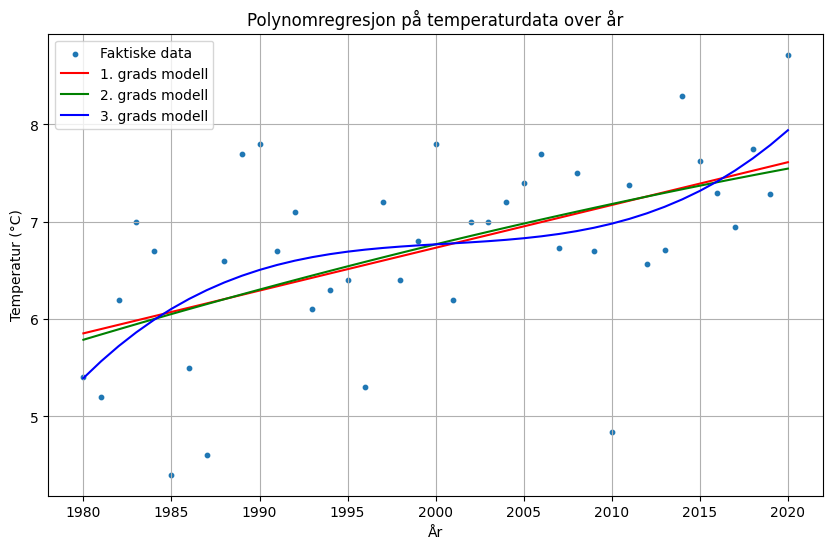

In [ ]:

# Bruk faktiske årstall som X
X = df_temp_renset['year'].values
y = df_temp_renset['value'].values

# Funksjon for å lage modeller
def create_model(X, y, deg):
    polynom_deg = np.polyfit(X, y, deg=deg)
    my_model = np.poly1d(polynom_deg)
    return my_model

# Lag modeller
model_1 = create_model(X, y, 1)
model_2 = create_model(X, y, 2)
model_3 = create_model(X, y, 3)

# Print modellene
print("1. grads modell:\n", model_1, "\n")
print("2. grads modell:\n", model_2, "\n")
print("3. grads modell:\n", model_3)

# Sorter X for jevn graf
X_sorted = np.sort(X)
y_1 = model_1(X_sorted)
y_2 = model_2(X_sorted)
y_3 = model_3(X_sorted)

# Plotting av modellene
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=10, label="Faktiske data")
plt.plot(X_sorted, y_1, color='red', label='1. grads modell')
plt.plot(X_sorted, y_2, color='green', label='2. grads modell')
plt.plot(X_sorted, y_3, color='blue', label='3. grads modell')
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.title("Polynomregresjon på temperaturdata over år")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Beregning av R²-score
r2_1 = r2_score(y, model_1(X))
r2_2 = r2_score(y, model_2(X))
r2_3 = r2_score(y, model_3(X))

# Printer for å se hvilken som er nærmest 1
print(f"R²-score for 1. grads modell: {r2_1:.4f}")
print(f"R²-score for 2. grads modell: {r2_2:.4f}")
print(f"R²-score for 3. grads modell: {r2_3:.4f}")

R²-score for 1. grads modell: 0.2925
R²-score for 2. grads modell: 0.2936
R²-score for 3. grads modell: 0.3258


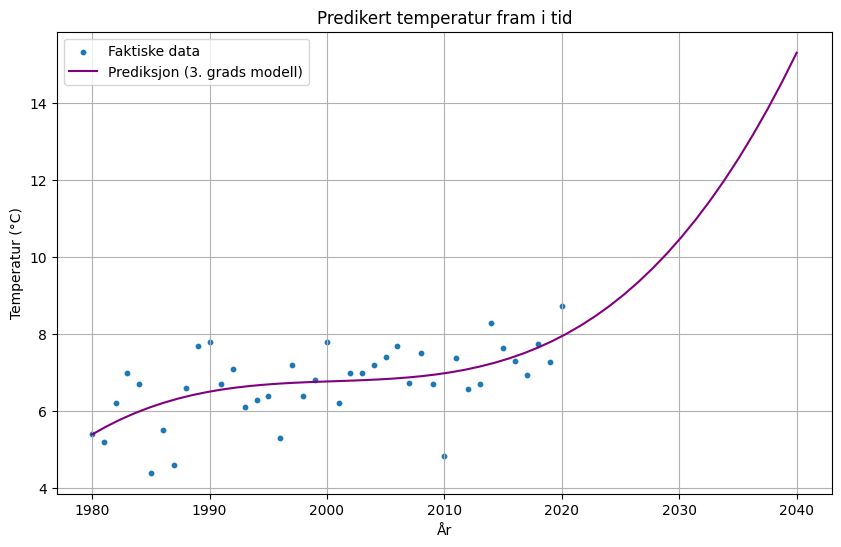

In [8]:
# Prediksjon
test_X = np.linspace(X.min(), 2040)
y_predict = model_3(test_X)

# Plotting med prediksjon
plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Faktiske data', s=10)
plt.plot(test_X, y_predict, color='purple', label='Prediksjon (3. grads modell)')
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.title("Predikert temperatur fram i tid")
plt.legend()
plt.grid(True)
plt.show()